
# How to Visualize Filters and Feature Maps in Convolutional Neural Networks


After completing this tutorial, you will know:
- How to develop a visualization for specific filters in a convolutional neural network.
- How to develop a visualization for specific feature maps in a convolutional neural network.
- How to systematically visualize feature maps for each block in a deep convolutional neural network.


## Tutorial Overview.
1. Visualizing Convolutional Layers.
2. Pre-fit VGG Model
3. How to Visualize Filters.
4. How to Visualize Feature maps.

## 1. Visualizing Convolutional Layers.
CNNs are designed to work  with image data, and their structure and function suggest that should be less inscrutable  than orther types of neural networks.

The models are comprised of small  linear filters and the result of applying filters called activation maps, or more generally, feature maps.

Both filters and feature maps can be visualized.

## 2. Pre-fit VGG model.
We must have a model to visulize[here](https://keras.io/api/applications/)

We can load and summarize the VGG16 model with just a few lines of code;

```python
# load vgg model
from tensorflow.keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()
```

Running the example will  load the model  weight into memory and print a summary of the loaded model. These weight of VGG-16 are approximately 500Mb. 

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## How to Visualize Filters:
In neural network terminology, the learned filters are simply weights, yet because of the specialized two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image is meaningful (or could be).

The model summary printed in the previous section summarizes the output shape of each layer, e.g. the shape of the resulting feature maps. It does not give any idea of the shape of the filters (weights) in the network, only the total number of weights per layer.

- [model.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) property.

Each layer has a **layer.name** property, where the convolutional layers have a naming convolution like block#_conv#, where the ‘#‘ is an integer. Therefore, we can check the name of each layer and skip any that don’t contain the string ‘conv‘.

In [2]:
# summarize filter shapes
for layer in model.layers:
    if 'conv' not in layer.name:
        continue

Each convolutional layer has two sets of weights.

One is the block of filters and the other is the block of bias values. These are accessible via the **layer.get_weights()** function. We can retrieve these weights and then summarize their shape.

In [4]:
# get filter weights 
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


Setiing the privous code.

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
for layer in model.layers:
    if "conv" not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape, biases.shape)

block1_conv1 (3, 3, 3, 64) (64,)
block1_conv2 (3, 3, 64, 64) (64,)
block2_conv1 (3, 3, 64, 128) (128,)
block2_conv2 (3, 3, 128, 128) (128,)
block3_conv1 (3, 3, 128, 256) (256,)
block3_conv2 (3, 3, 256, 256) (256,)
block3_conv3 (3, 3, 256, 256) (256,)
block4_conv1 (3, 3, 256, 512) (512,)
block4_conv2 (3, 3, 512, 512) (512,)
block4_conv3 (3, 3, 512, 512) (512,)
block5_conv1 (3, 3, 512, 512) (512,)
block5_conv2 (3, 3, 512, 512) (512,)
block5_conv3 (3, 3, 512, 512) (512,)


we can see that all convolutional layers use 3x3 filters, which are small  and perhaps easy to interpret.

CNNs have the depth of a filter must match  the depth  of the input for the filter( the number channels).

Input image with three  channels for red, green, blue, that each filter has a depth of three. We could visualize one filter as a plot wiht three images. The problem is, we then have 63 other filters that we might like to visualize.

We can retrieve the filters from the first layer as follows:

```python
# retrieve weight from the second hidden layer 
filters, biases = model.layers[1].get_weights()
```

The weight values will likely be small positive and negative values centered around 0.0.

We can normalize their values to the range 0-1 to make them easy to visualize.

```python
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
```
Now we can enumerate the first six filters out of the 64 in the block and plot each of the three channels of each filter.

We use the matplotlib library and plot each filter as a new row of subplots, and each filter channel or depth as a new column.

```python
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()
```

**Full code.**

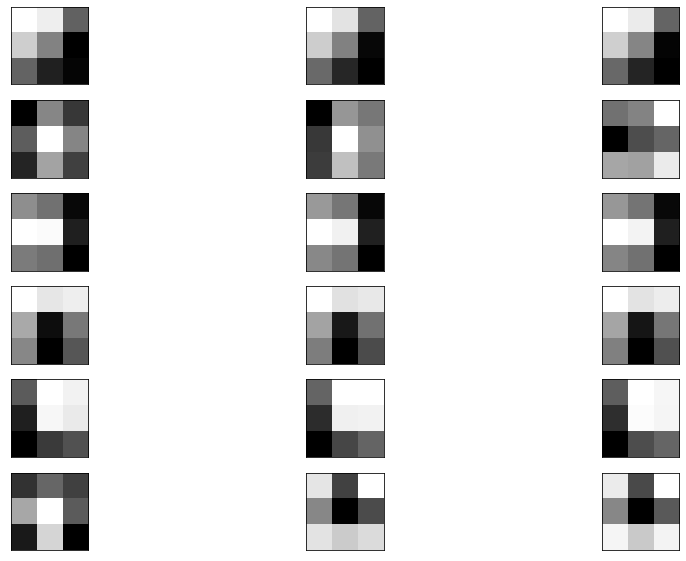

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt 

def display(filters, index_layer):
    n_filters, ix = 6, 1
    plt.figure(figsize=(15, 10))
    for i in range(n_filters):
        f = filters[:,:,:,i]
        for j in range(3):
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:,:,j], cmap='gray')
            ix +=1
    namedirs = "Image/IndexVGG_{}_".format(index_layer)
    plt.savefig(namedirs+"_image.png")
    plt.show()
    
def main(index_layer):
    model = VGG16()
    filters, biases = model.layers[index_layer].get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    display(filters, index_layer)

if __name__ == "__main__":
    main(1)

Running the example  create a figure with six rows of three images, or 18 images, one row for each  filter and one column for each channel. 

We can see that in some cases, the filter is the same across the channels (the first row), and in others, the filters differ (the last row).

The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. Using this intuition, we can see that the filters on the first row detect a gradient from light in the top left to dark in the bottom right.

Although we have a visualization, we only see the first six of the 64 filters in the first convolutional layer. Visualizing all 64 filters in one image is feasible.

Sadly, this does not scale; if we wish to start looking at filters in the second convolutional layer, we can see that again we have 64 filters, but each has 64 channels to match the input feature maps. To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail.

## How to Visualize Feature Maps

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

In order to explore the visualization of feature maps, we need input for the VGG16 model that can be used to create activations.

![iamhe](ImageInput/bird.jpg)

- [Click to download(bird.jpg)](https://machinelearningmastery.com/wp-content/uploads/2019/02/bird.jpg)

Next, we need a clearer idea of the shape of the feature maps output by each of the convolutional layer and the layer index so that we can retrieve the appropriate output.

The example below will enumerate all layers in the model and print the output size or feature map size for each convolutional layer as well as the layer index in the model.


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


We can use this information and design a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map.

For example, after loading the VGG model, we can define a new model that outputs a feature map from the first convolutional layer (index 1) as follows.

```python
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
```

Making a prediction with this model will give the feature map for the first convolutional layer for a given provided input image. Let’s implement this.

After defining the model, we need to load the bird image with the size expected by the model, in this case, 224×224.

```python
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
```

Next, the image PIL object needs to be converted to a NumPy array of pixel data and expanded from a 3D array to a 4D array with the dimensions of [samples, rows, cols, channels], where we only have one sample.

```python
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
```

The pixel values then need to be scaled appropriately for the VGG model.

```python
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
```

We are now ready to get the feature map. We can do this easy by calling the model.predict() function and passing in the prepared single image.

```python
# get feature map for first hidden layer
feature_maps = model.predict(img)
```

We know the result will be a feature map with 224x224x64. We can plot all 64 two-dimensional images as an 8×8 square of images.

```python
# plot all 64 maps in an 8x8 squares
import matplotlib.pyplot as plt
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()
```
Tying all of this together, the complete code example of visualizing the feature map for the first convolutional layer in the VGG16 model for a bird input image is listed below.

**Full code**

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


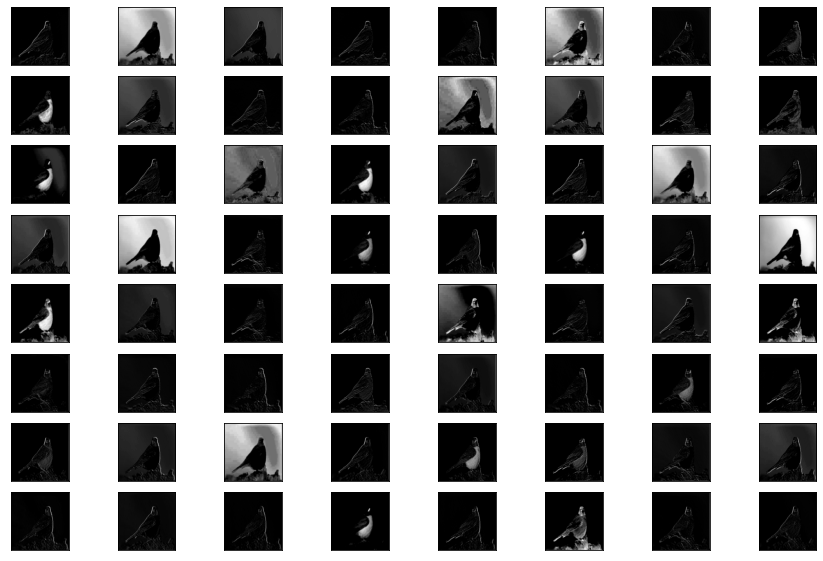

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

def display(feature_image):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_"
    # plt.savefig(filename+"nam.png")
    plt.show()

def main():
    model = VGG16()
    model = Model(inputs=model.inputs, outputs=model.layers[1].output)
    model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(224, 224))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    feature_map = model.predict(img)
    display(feature_map)
if __name__ == "__main__":
    main()

This is an interesting result and generally matches our expectation. We could update the example to plot the feature maps from the output of other specific convolutional layers.

Another approach would be to collect feature maps output from each block of the model in a single pass, then create an image of each.

There are five main blocks in the image (e.g. block1, block2, etc.) that end in a pooling layer. The layer indexes of the last convolutional layer in each block are [2, 5, 9, 13, 17].

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims
model = VGG16()

In [5]:
# redefine model to output right after the first hidden layer
# ixs = [2, 5, 9, 13, 17]
ixs = [2, 5, 9]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Making a prediction with this new model will result in a list of feature maps.

We know that the number of feature maps (e.g. depth or number of channels) in deeper layers is much more than 64, such as 256 or 512. Nevertheless, we can cap the number of feature maps visualized at 64 for consistency.

```python
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()
```

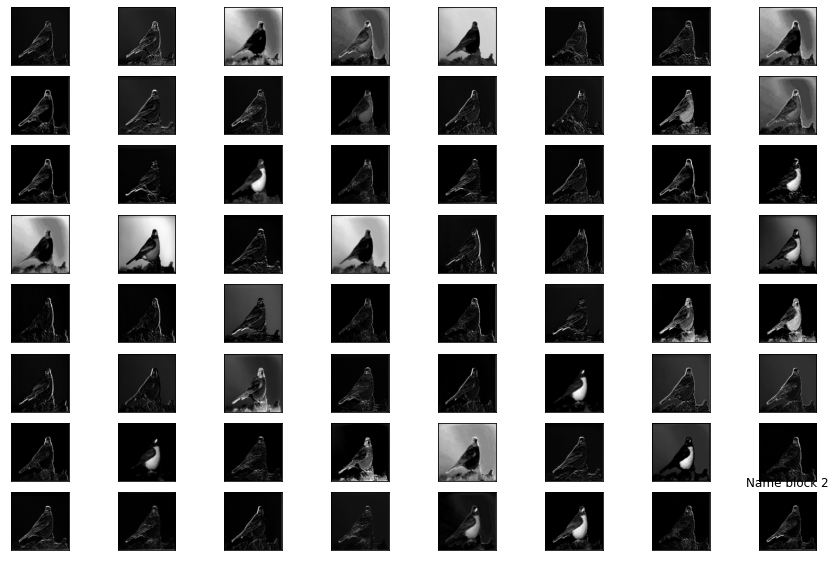

Anh so 2


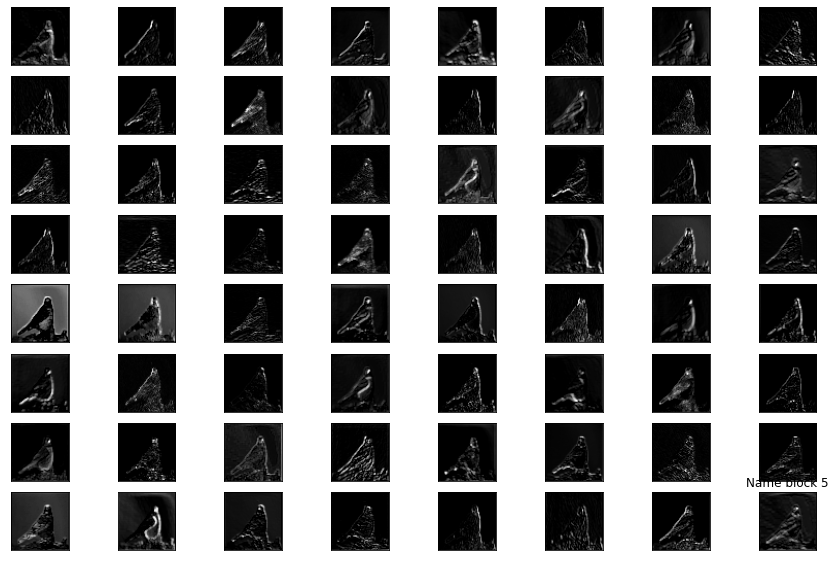

Anh so 5


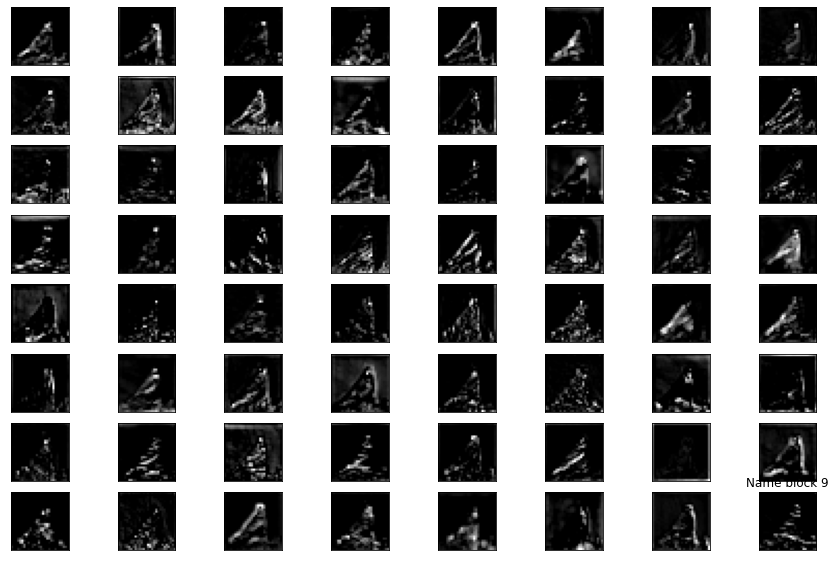

Anh so 9


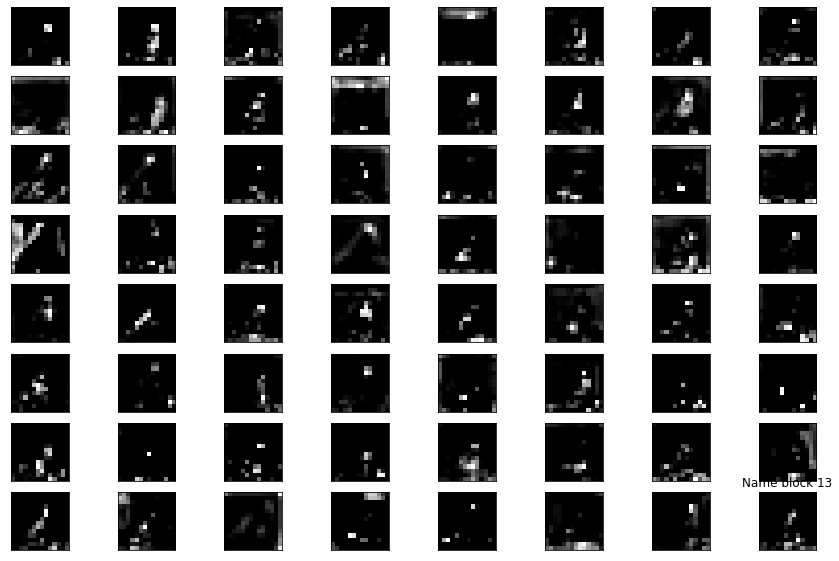

Anh so 13


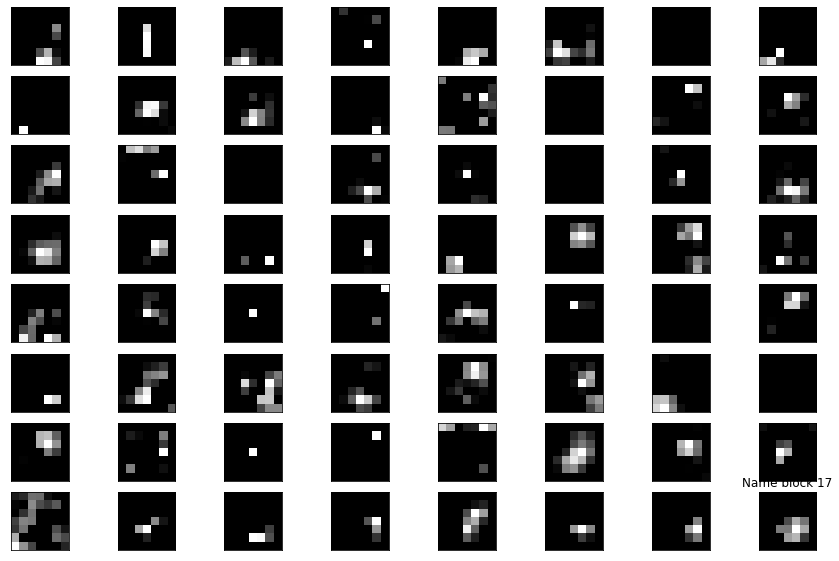

Anh so 17


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
import matplotlib.pyplot as plt 

def display(feature_image, name_file):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    filename= "Image/femp_{}_".format(name_file)
    plt.savefig(filename+"nam.png")
    plt.title("Name block {}".format(name_file))
    plt.show()

def main():
    model = VGG16()
    ixs = [2, 5, 9, 13, 17]
    outputs = [model.layers[i+1].output for i in ixs]
    model = Model(inputs=model.inputs, outputs=outputs)
    # model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(224, 224))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    fe_map = model.predict(img)
    its = 0
    for feature_map in fe_map:
        display(feature_map, ixs[its])
        print("Anh so {}".format(ixs[its]))
        its += 1
if __name__ == "__main__":
    main()

## Further Reading

This section provides more resources on the topic if you are looking to go deeper.
### Books

- Chapter 9: Convolutional Networks, [Deep Learning](https://amzn.to/2Dl124s), 2016.
- Chapter 5: Deep Learning for Computer Vision, [Deep Learning with Python](https://amzn.to/2Dnshvc), 2017.

### API

- [Keras Applications API](https://keras.io/applications/)
- [Visualization of the filters of VGG16, Keras Example.](https://github.com/keras-team/keras/blob/master/examples/conv_filter_visualization.py)

### Articles

- [Lecture 12 | Visualizing and Understanding, CS231n: Convolutional Neural Networks for Visual Recognition, (slides)](https://www.youtube.com/watch?v=6wcs6szJWMY) 2017.
- [Visualizing what ConvNets learn, CS231n: Convolutional Neural Networks for Visual Recognition.](https://cs231n.github.io/understanding-cnn/)
- [How convolutional neural networks see the world](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html), 2016.

## Summary

In this tutorial, you discovered how to develop simple visualizations for filters and feature maps in a convolutional neural network.

Specifically, you learned:

- How to develop a visualization for specific filters in a convolutional neural network.
- How to develop a visualization for specific feature maps in a convolutional neural network.
- How to systematically visualize feature maps for each block in a deep convolutional neural network.
